[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/tutorials/feature-use/lagged_covariates_energy_ercot.ipynb)

# Using Lagged Covariates

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

In [2]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df_ercot = pd.read_csv(data_location + "multivariate/load_ercot_regions.csv")
df_ercot_y = pd.read_csv(data_location + "energy/load_ercot.csv")
df_ercot['y'] = df_ercot_y['y']
df_ercot.head()

,ds,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,y
0,2004-01-01 01:00:00,7225.09,877.79,1044.89,745.79,7124.21,1660.45,3639.12,654.61,22971.94
1,2004-01-01 02:00:00,6994.25,850.75,1032.04,721.34,6854.58,1603.52,3495.16,639.88,22191.52
2,2004-01-01 03:00:00,6717.42,831.63,1021.10,699.70,6639.48,1527.99,3322.70,623.42,21383.44
3,2004-01-01 04:00:00,6554.27,823.56,1015.41,691.84,6492.39,1473.89,3201.72,613.49,20866.56
4,2004-01-01 05:00:00,6511.19,823.38,1009.74,686.76,6452.26,1462.76,3163.74,613.32,20723.15


In [3]:
regions = list(df_ercot)[1:-1]

In [4]:
df_ercot['y'].isnull().sum()

0

## Baseline Model

In [5]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    learning_rate=0.1, 
)
metrics = m.fit(df, freq="H")

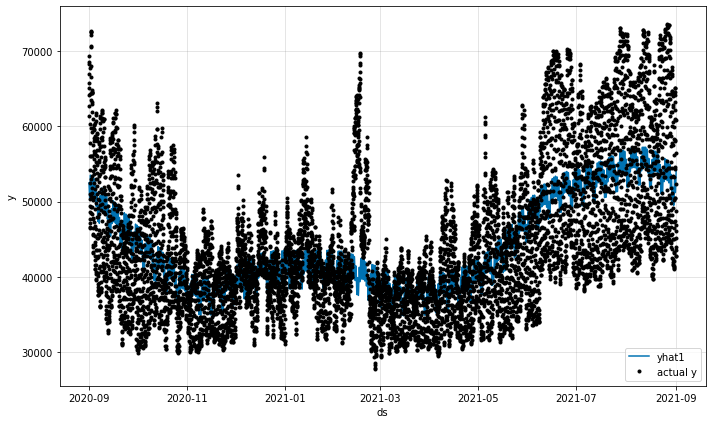

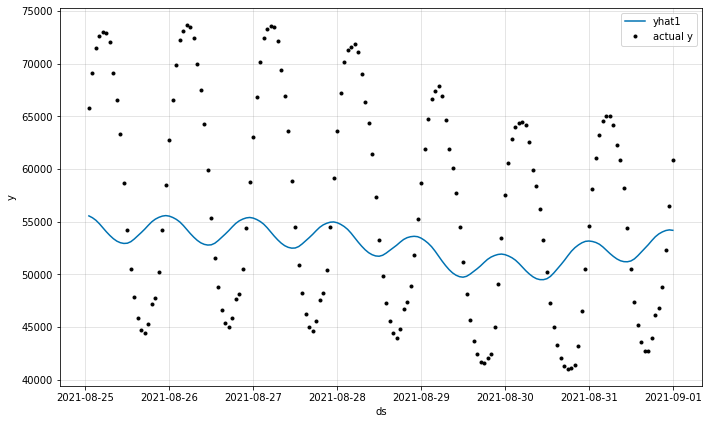

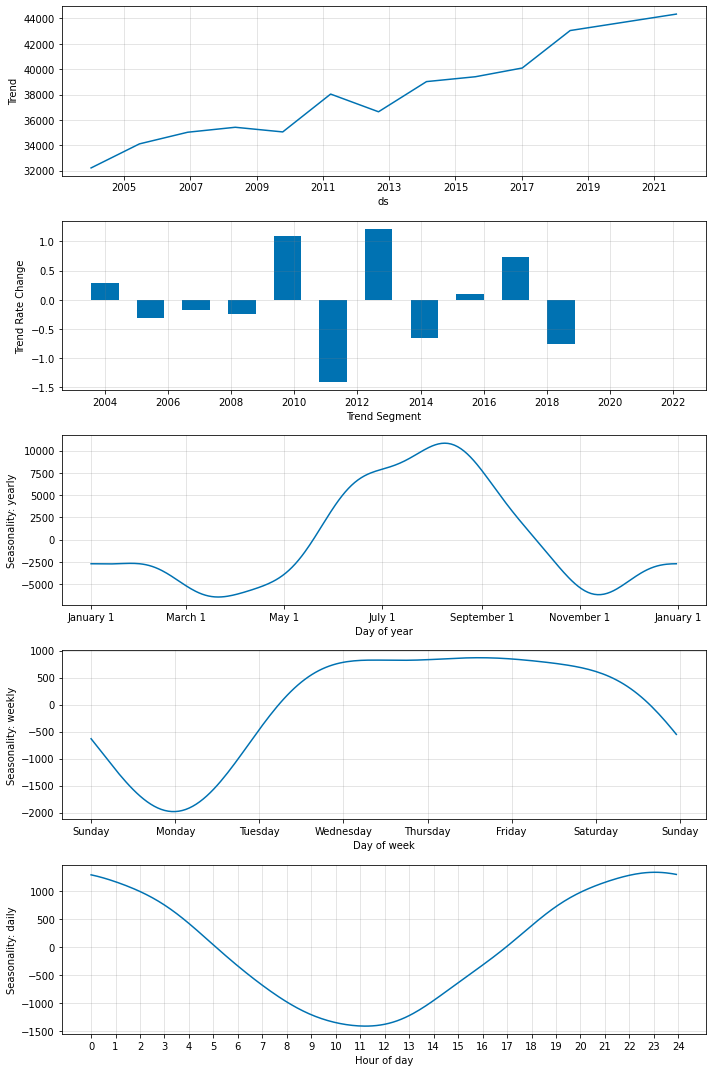

In [6]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast)
param = m.plot_parameters()

##  3-steps ahead AR Model

In [ ]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    n_forecasts=3,
    n_lags=3,
    learning_rate=0.1,
)
m = m.highlight_nth_step_ahead_of_each_forecast(3)
metrics = m.fit(df, freq="H")


Epoch[39/52]:  75%|▊| 39/52 [04:04<01:42,  7.88s/it, SmoothL1Loss=0.00188, MAE=1.74e+3, RMSE=2.32e+3, SmoothL1Loss-3=0.00314, MAE-3=2.28e+3, RMSE-3=3e+3

In [ ]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 3-steps ahead AR and Lagged Regressors Model

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=3,
    n_lags=3,
    learning_rate= 0.1,
)
m = m.add_lagged_regressor(names=regions) #, only_last_value=True)
m.highlight_nth_step_ahead_of_each_forecast(3)
metrics = m.fit(df, freq="H")


In [ ]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead Long AR Model

In [ ]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.1,
)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

In [ ]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead Long AR Model with last observation of Lagged Regressors

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.1,
)
m = m.add_lagged_regressor(names=regions, only_last_value=True)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

In [ ]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead AR Model with full Lagged Regressors

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=24,
    learning_rate=0.01,
)
m = m.add_lagged_regressor(names=regions)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

In [ ]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead Neural Model with Long AR

In [ ]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.01,
    num_hidden_layers=1,
    d_hidden=16,
)
m = m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

# metrics

In [ ]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
comp = m.plot_components(forecast[-7*24:])
# param = m.plot_parameters()

## 24-steps ahead Neural Model with Long AR and Lagged Regressors

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.01,
    num_hidden_layers=1,
    d_hidden=16,
)
m = m.add_lagged_regressor(names=regions)#, only_last_value=True)
m = m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

# metrics

In [ ]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
comp = m.plot_components(forecast[-7*24:])
# param = m.plot_parameters()